# CRISP DM


1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment / Kesimpulan

# Business Understanding


Masalah : Maih banyak pelanggan yang tidak puas dengan layanan e-commerce,
yang menyebabkan rendahnya retensi dan loyalitas pelanggan.

Solusi : Dibuatkan model Machine Learning untuk memprediksi tingkat kepuasan
pelanggan berdasarkan pola
belanja dan karakteristik pelanggan.


# Data Understanding

## Penjelasan


Data ini berisi informasi tentang perilaku 350 pelanggan e-commerce dengan berbagai atribut seperti usia, jenis kelamin, kota, dan jenis keanggotaan. Pelanggan memiliki riwayat pembelian dengan jumlah item berkisar antara 7 hingga 21 item, dan juga memiliki berbagai fitur yang dapat digunakan untuk analisis prediktif.


Mengenai Dataset yang dipakai :
Customer ID: Identifikasi unik pelanggan.
Gender: Jenis kelamin pelanggan (Male/Female).
Age: Usia pelanggan dalam tahun.
City: Kota tempat tinggal pelanggan.
Membership Type: Jenis keanggotaan (Basic, Silver, Gold, Platinum).
Total Spend: Total pengeluaran pelanggan.
Items Purchased: Jumlah barang yang dibeli.
Average Rating: Rata-rata rating yang diberikan.
Discount Applied: Status penerimaan diskon (True/False).
Days Since Last Purchase: Hari sejak pembelian terakhir.
Satisfaction Level: Tingkat kepuasan pelanggan (Satisfied, Neutral, Unsatisfied).


Tujuan : Mengklasifikasikan tingkat kepuasan pelanggan berdasarkan pola belanja, jenis keanggotaan, dan faktor lainnya.

## Read Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/E-commerce Customer Behavior.csv')

In [ ]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


**Terdapat 350 baris dan 11 kolom**

In [ ]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

```
y = Satisfaction Level
X = Gender, Age, City, Membership Type, Total Spend, Items Purchased, Average Rating, Discount Applied, Days Since Last Purchase
```

# Data Preparation

## Explore Data

In [ ]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
df.shape

(350, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


## Cleaning

In [ ]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.isna().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
343,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
344,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
345,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
346,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


## Encoding Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Satisfaction Level'] = le.fit_transform(df['Satisfaction Level'])
df['Gender'] = le.fit_transform(df['Gender'])
df['City'] = le.fit_transform(df['City'])
df['Membership Type'] = le.fit_transform(df['Membership Type'])
df['Discount Applied'] = le.fit_transform(df['Discount Applied'])


In [ ]:
df['Satisfaction Level']

,Satisfaction Level
0,1
1,0
2,2
3,1
4,2
...,...
343,2
344,0
345,1
346,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    int64  
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    int64  
 4   Membership Type           348 non-null    int64  
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    int64  
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 30.0 KB


In [ ]:
df['Satisfaction Level'].value_counts()

,count
Satisfaction Level,
1,125
2,116
0,107


## EDA

In [ ]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,1,25,1
1,102,1,34,2,2,780.50,11,4.1,0,18,0
2,103,0,43,0,0,510.75,9,3.4,1,42,2
3,104,1,30,5,1,1480.30,19,4.7,0,12,1
4,105,1,27,3,2,720.40,13,4.0,1,55,2


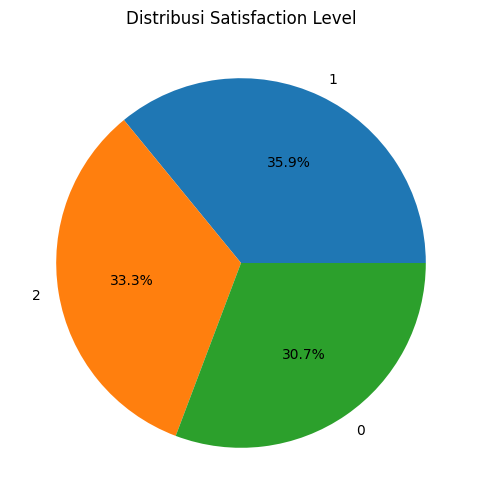

In [ ]:
plt.figure(figsize=(6,6))
df['Satisfaction Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribusi Satisfaction Level')
plt.show()


In [ ]:
# Menghitung jumlah Membership Type untuk tiap Gender
membership_gender_counts = df.groupby('Satisfaction Level')['Gender'].value_counts().unstack()
# Menampilkan hasil
membership_gender_counts

Gender,0,1
Satisfaction Level,,
0,56,51
1,58,67
2,59,57


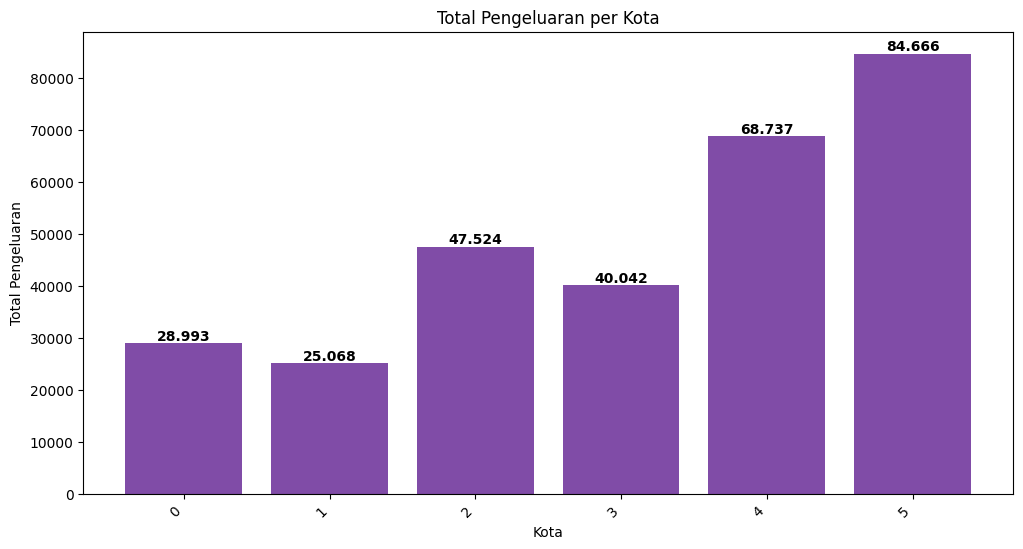

In [ ]:
# Mengelompokkan total pengeluaran per kota
city_spend = df.groupby('City')['Total Spend'].sum().reset_index()

# Membuat grafik dengan nama kota pada sumbu X
plt.figure(figsize=(12, 6))
bars = plt.bar(city_spend['City'], city_spend['Total Spend'], color='indigo', alpha=0.7)

# Menambahkan label di atas bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(bar.get_height()):,}'.replace(',', '.'),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Kota')
plt.ylabel('Total Pengeluaran')
plt.title('Total Pengeluaran per Kota')
plt.xticks(rotation=45, ha='right')
plt.show()

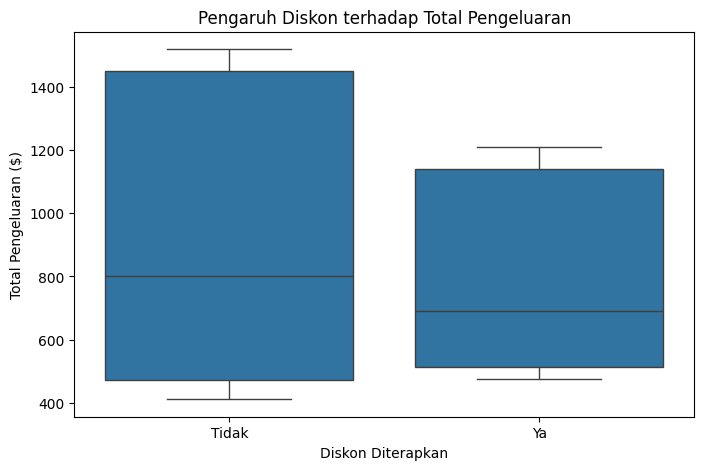

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Discount Applied"], y=df["Total Spend"])
plt.title("Pengaruh Diskon terhadap Total Pengeluaran")
plt.xlabel("Diskon Diterapkan")
plt.ylabel("Total Pengeluaran ($)")
plt.xticks([0, 1], ["Tidak", "Ya"])
plt.show()


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Menentukan fitur (X) dan target (y)
X = df[['Customer ID', 'Gender', 'Age', 'City', 'Membership Type', 'Total Spend',
        'Items Purchased','Discount Applied', 'Average Rating', 'Days Since Last Purchase']]

y = df['Satisfaction Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
len(X_train)

278

In [ ]:
len(X_test)

70

# Modeling Machine Learning


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

# Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Seleksi fitur terbaik (hanya 3 fitur terbaik untuk menekan kompleksitas)
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X_scaled, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Menambah noise yang lebih besar
noise = np.random.normal(0, 0.5, X_train.shape)
X_train_noisy = X_train + noise

model1 = LogisticRegression(max_iter=1000, C=0.0001, penalty='l2', class_weight='balanced')
model2 = DecisionTreeClassifier(max_depth=20, min_samples_split=200, min_samples_leaf=50, class_weight='balanced')
model3 = KNeighborsClassifier(n_neighbors=41, weights='distance')

# Pelatihan model
model1.fit(X_train_noisy, y_train)
model2.fit(X_train_noisy, y_train)
model3.fit(X_train_noisy, y_train)

print('Akurasi:')
print('Model1 LogisticRegression: ', model1.score(X_test, y_test))
print('Model2 DecisionTreeClassifier: ', model2.score(X_test, y_test))
print('Model3 KNeighborsClassifier: ', model3.score(X_test, y_test))

logistic_regression_score = model1.score(X_test, y_test)
decision_tree_score = model2.score(X_test, y_test)
k_neighbors_score = model3.score(X_test, y_test)


Akurasi:
Model1 LogisticRegression:  0.9714285714285714
Model2 DecisionTreeClassifier:  0.6095238095238096
Model3 KNeighborsClassifier:  0.9809523809523809


# Evaluasi

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'K-Neighbors']
scores = [logistic_regression_score, decision_tree_score, k_neighbors_score]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, scores, color=['dodgerblue', 'deepskyblue', 'lightskyblue'])

# Adding text labels for the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Comparison without Cross-Validation')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Display the plot
plt.show()

NameError: name 'logistic_regression_score' is not defined

# Kesimpulan/Deployment

Model K-Neighbors dengan akurasi 0.97 menunjukkan kinerja terbaik, diikuti oleh Logistic Regression dengan 0.88. Meskipun Decision Tree memiliki akurasi lebih rendah (0.59), hasil ini lebih stabil dan cenderung tidak mengalami overfitting, sehingga dapat lebih andal pada data baru.